# Sales Analysis Project 

In [6]:
import pandas as pd
# to read all directories we need to import os
import os

In [12]:
## Merge the 12 sets of data into one data to work with
'''
df = pd.read_csv("data\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv")

files = [file for file in os.listdir('data\\SalesAnalysis\\Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("data\\SalesAnalysis\\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("data\\all_data.csv", index = False)'''

'\ndf = pd.read_csv("data\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv")\n\nfiles = [file for file in os.listdir(\'data\\SalesAnalysis\\Sales_Data\')]\n\nall_months_data = pd.DataFrame()\n\nfor file in files:\n    df = pd.read_csv("data\\SalesAnalysis\\Sales_Data\\" + file)\n    all_months_data = pd.concat([all_months_data, df])\n\nall_months_data.to_csv("data\\all_data.csv", index = False)'

In [13]:
df = pd.read_csv("data\\all_data.csv")
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"


## What was the best month for sales and how much earned?

## Data Cleaning

In [27]:
## Drop Rows of NAN
all_data = pd.read_csv('data\\all_data.csv')
nan_df = all_data[all_data.isna().any(axis=1)] # finding all nan

all_data = all_data.dropna(how="all") #dropping all na values
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [33]:
## Remove "O"
all_data = all_data[all_data['Order Date'].str[0:1] != "O"]

In [35]:
## Convert all columns to correct data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Arranging Data

In [34]:
## Ideal solutuion would be to create columns that would make it easy to interpet 

## Add month column
all_data['Month'] = all_data['Order Date'].str[0:1]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head(3)

## Now we will have to clean the data first before we convert into intger type

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4


In [36]:
## Add Sales Column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00


## Now answering what was the best month for sales

In [42]:
results = all_data.groupby(['Month']).mean().sort_values('Sales', ascending=False)

In [43]:
#results = all_data.groupby(['Month']).sum()

## Visualizing the data

<function matplotlib.pyplot.show(*args, **kw)>

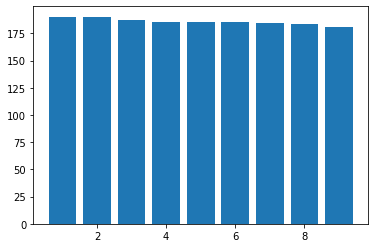

In [44]:
import matplotlib.pyplot as plt 

months = range(1,10)

plt.bar(months, results['Sales'])

plt.show